<a href="https://colab.research.google.com/github/Abin1401/Abin1401/blob/main/Wheather_Prediction_In_Austrailia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rainfall Prediction MAE: 2.57
Rainfall Prediction MSE: 92.91
Rainfall Prediction R-squared (R²): -0.44
Temperature Prediction MAE: 0.00
Temperature Prediction MSE: 0.00
Temperature Prediction R-squared (R²): 1.00
Wind Speed Prediction MAE: 0.00
Wind Speed Prediction MSE: 0.00
Wind Speed Prediction R-squared (R²): 1.00


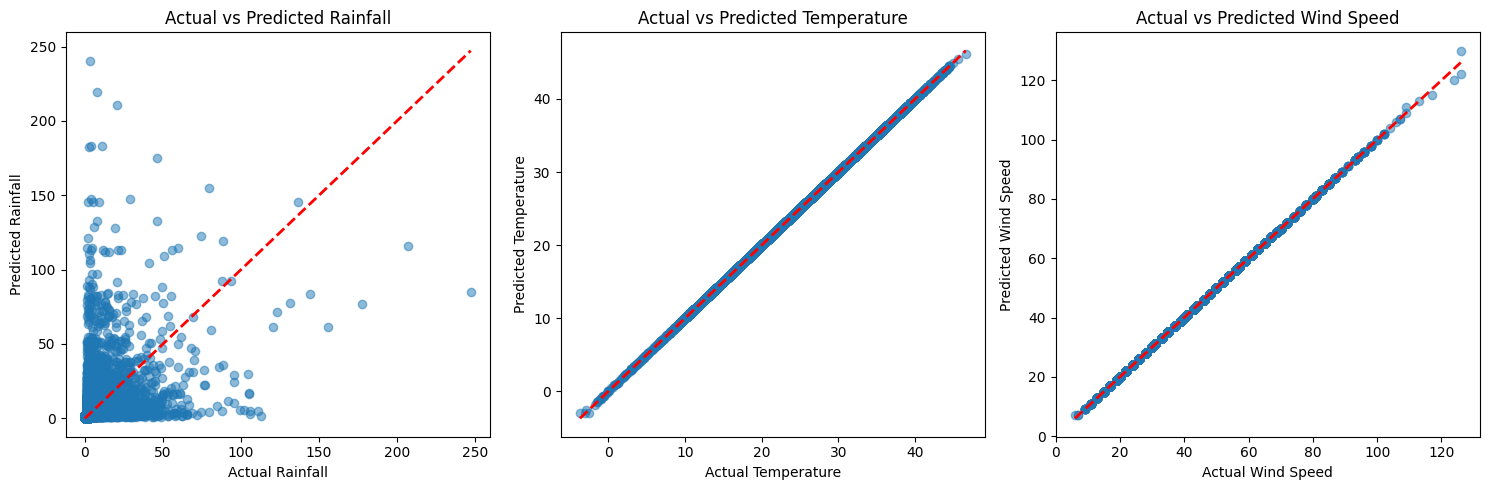

{'Predicted Rainfall (mm)': 0.0, 'Predicted Max Temperature (°C)': 25.0, 'Predicted Wind Speed (km/h)': 39.97696590566897}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Replace with your actual file path
weather_data = pd.read_csv(file_path)

# Data Cleaning
# 1. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
              'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = imputer.fit_transform(
    weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

# 2. Encode Categorical Variables
label_encoder = LabelEncoder()
weather_data['Location'] = label_encoder.fit_transform(weather_data['Location'])
weather_data['WindGustDir'] = label_encoder.fit_transform(weather_data['WindGustDir'].fillna('Unknown'))
weather_data['WindDir9am'] = label_encoder.fit_transform(weather_data['WindDir9am'].fillna('Unknown'))
weather_data['WindDir3pm'] = label_encoder.fit_transform(weather_data['WindDir3pm'].fillna('Unknown'))
weather_data['RainToday'] = label_encoder.fit_transform(weather_data['RainToday'].fillna('No'))

# Feature Engineering
# Selecting relevant features
features = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                         'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                         'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]

# Standardize Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Target Variables
target_rainfall = weather_data['Rainfall']
target_temp = weather_data['MaxTemp']
target_wind_speed = weather_data['WindGustSpeed']

# Split the Data into Training and Test Sets
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(features_scaled, target_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features_scaled, target_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(features_scaled, target_wind_speed, test_size=0.2, random_state=42)

# Train Decision Tree Regressors
rain_model = DecisionTreeRegressor(random_state=42)
rain_model.fit(X_train_rain, y_train_rain)

temp_model = DecisionTreeRegressor(random_state=42)
temp_model.fit(X_train_temp, y_train_temp)

wind_model = DecisionTreeRegressor(random_state=42)
wind_model.fit(X_train_wind, y_train_wind)

# Predictions on Test Data
rain_pred = rain_model.predict(X_test_rain)
temp_pred = temp_model.predict(X_test_temp)
wind_pred = wind_model.predict(X_test_wind)

# Evaluation Metrics
rain_mae = mean_absolute_error(y_test_rain, rain_pred)
temp_mae = mean_absolute_error(y_test_temp, temp_pred)
wind_mae = mean_absolute_error(y_test_wind, wind_pred)

rain_mse = mean_squared_error(y_test_rain, rain_pred)
temp_mse = mean_squared_error(y_test_temp, temp_pred)
wind_mse = mean_squared_error(y_test_wind, wind_pred)

rain_r2 = r2_score(y_test_rain, rain_pred)
temp_r2 = r2_score(y_test_temp, temp_pred)
wind_r2 = r2_score(y_test_wind, wind_pred)

# Print Evaluation Metrics
print(f'Rainfall Prediction MAE: {rain_mae:.2f}')
print(f'Rainfall Prediction MSE: {rain_mse:.2f}')
print(f'Rainfall Prediction R-squared (R²): {rain_r2:.2f}')

print(f'Temperature Prediction MAE: {temp_mae:.2f}')
print(f'Temperature Prediction MSE: {temp_mse:.2f}')
print(f'Temperature Prediction R-squared (R²): {temp_r2:.2f}')

print(f'Wind Speed Prediction MAE: {wind_mae:.2f}')
print(f'Wind Speed Prediction MSE: {wind_mse:.2f}')
print(f'Wind Speed Prediction R-squared (R²): {wind_r2:.2f}')

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(15, 5))

# Rainfall
plt.subplot(1, 3, 1)
plt.scatter(y_test_rain, rain_pred, alpha=0.5)
plt.plot([y_test_rain.min(), y_test_rain.max()], [y_test_rain.min(), y_test_rain.max()], 'r--', lw=2)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')

# Temperature
plt.subplot(1, 3, 2)
plt.scatter(y_test_temp, temp_pred, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')

# Wind Speed
plt.subplot(1, 3, 3)
plt.scatter(y_test_wind, wind_pred, alpha=0.5)
plt.plot([y_test_wind.min(), y_test_wind.max()], [y_test_wind.min(), y_test_wind.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed')

plt.tight_layout()
plt.show()

# Modified Prediction on New Data
def predict_weather(new_data):
    # Convert new data into a DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Function to handle unseen labels
    def encode_or_default(label, encoder):
        try:
            return encoder.transform([label])[0]
        except ValueError:
            # Return the most common label or a default value
            return encoder.transform([encoder.classes_[0]])[0]

    # Encode categorical features, handling unseen labels
    new_data_df['Location'] = new_data_df['Location'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['WindGustDir'] = new_data_df['WindGustDir'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['WindDir9am'] = new_data_df['WindDir9am'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['WindDir3pm'] = new_data_df['WindDir3pm'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['RainToday'] = new_data_df['RainToday'].apply(lambda x: encode_or_default(x, label_encoder))

    # Standardize features
    new_data_scaled = scaler.transform(new_data_df)

    # Predict Rainfall, Temperature, and Wind Speed
    rain_pred = rain_model.predict(new_data_scaled)
    temp_pred = temp_model.predict(new_data_scaled)
    wind_pred = wind_model.predict(new_data_scaled)

    return {
        'Predicted Rainfall (mm)': rain_pred[0],
        'Predicted Max Temperature (°C)': temp_pred[0],
        'Predicted Wind Speed (km/h)': wind_pred[0]
    }

# Example of predicting weather for a new input
new_weather_data = {
    'MinTemp': 15.0,
    'MaxTemp': 25.0,
    'Evaporation': 5.0,
    'Sunshine': 7.0,
    'WindGustSpeed': 40.0,
    'WindSpeed9am': 20.0,
    'WindSpeed3pm': 25.0,
    'Humidity9am': 70.0,
    'Humidity3pm': 50.0,
    'Pressure9am': 1010.0,
    'Pressure3pm': 1008.0,
    'Cloud9am': 3.0,
    'Cloud3pm': 5.0,
    'Temp9am': 20.0,
    'Temp3pm': 24.0,
    'Location': 'Albury',
    'WindGustDir': 'N',
    'WindDir9am': 'NW',
    'WindDir3pm': 'N',
    'RainToday': 'No'
}

predicted_weather = predict_weather(new_weather_data)
print(predicted_weather)

Rainfall Prediction MAE: 1.86
Rainfall Prediction MSE: 34.77
Rainfall Prediction R-squared (R²): 0.46
Temperature Prediction MAE: 0.00
Temperature Prediction MSE: 0.00
Temperature Prediction R-squared (R²): 1.00
Wind Speed Prediction MAE: 0.00
Wind Speed Prediction MSE: 0.00
Wind Speed Prediction R-squared (R²): 1.00


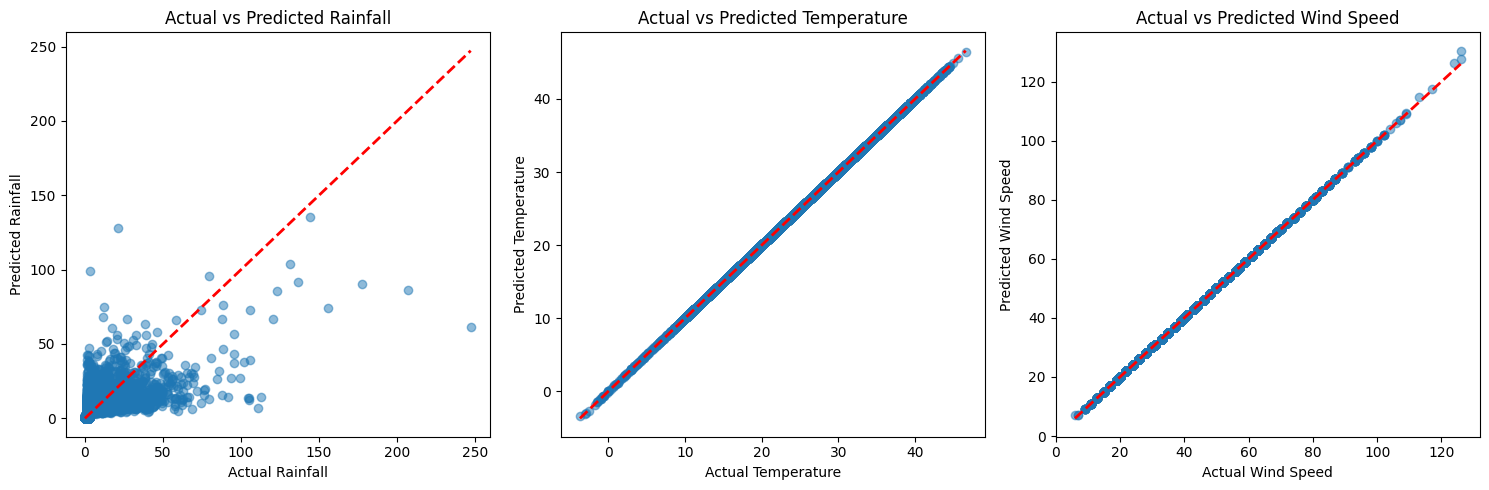

{'Predicted Rainfall (mm)': 0.3847721363548717, 'Predicted Max Temperature (°C)': 25.0, 'Predicted Wind Speed (km/h)': 39.97696590567066}


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Weather Training Data.csv'  # Replace with your actual file path
weather_data = pd.read_csv(file_path)

# Data Cleaning
# 1. Handle Missing Values
imputer = SimpleImputer(strategy='mean')
weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
              'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = imputer.fit_transform(
    weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

# 2. Encode Categorical Variables
label_encoder = LabelEncoder()
weather_data['Location'] = label_encoder.fit_transform(weather_data['Location'])
weather_data['WindGustDir'] = label_encoder.fit_transform(weather_data['WindGustDir'].fillna('Unknown'))
weather_data['WindDir9am'] = label_encoder.fit_transform(weather_data['WindDir9am'].fillna('Unknown'))
weather_data['WindDir3pm'] = label_encoder.fit_transform(weather_data['WindDir3pm'].fillna('Unknown'))
weather_data['RainToday'] = label_encoder.fit_transform(weather_data['RainToday'].fillna('No'))

# Feature Engineering
# Selecting relevant features
features = weather_data[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                         'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                         'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]

# Standardize Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Target Variables
target_rainfall = weather_data['Rainfall']
target_temp = weather_data['MaxTemp']
target_wind_speed = weather_data['WindGustSpeed']

# Split the Data into Training and Test Sets
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(features_scaled, target_rainfall, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features_scaled, target_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(features_scaled, target_wind_speed, test_size=0.2, random_state=42)

# Train Random Forest Regressors
rain_model = RandomForestRegressor(n_estimators=100, random_state=42)
rain_model.fit(X_train_rain, y_train_rain)

temp_model = RandomForestRegressor(n_estimators=100, random_state=42)
temp_model.fit(X_train_temp, y_train_temp)

wind_model = RandomForestRegressor(n_estimators=100, random_state=42)
wind_model.fit(X_train_wind, y_train_wind)

# Predictions on Test Data
rain_pred = rain_model.predict(X_test_rain)
temp_pred = temp_model.predict(X_test_temp)
wind_pred = wind_model.predict(X_test_wind)

# Evaluation Metrics
rain_mae = mean_absolute_error(y_test_rain, rain_pred)
temp_mae = mean_absolute_error(y_test_temp, temp_pred)
wind_mae = mean_absolute_error(y_test_wind, wind_pred)

rain_mse = mean_squared_error(y_test_rain, rain_pred)
temp_mse = mean_squared_error(y_test_temp, temp_pred)
wind_mse = mean_squared_error(y_test_wind, wind_pred)

rain_r2 = r2_score(y_test_rain, rain_pred)
temp_r2 = r2_score(y_test_temp, temp_pred)
wind_r2 = r2_score(y_test_wind, wind_pred)

# Print Evaluation Metrics
print(f'Rainfall Prediction MAE: {rain_mae:.2f}')
print(f'Rainfall Prediction MSE: {rain_mse:.2f}')
print(f'Rainfall Prediction R-squared (R²): {rain_r2:.2f}')

print(f'Temperature Prediction MAE: {temp_mae:.2f}')
print(f'Temperature Prediction MSE: {temp_mse:.2f}')
print(f'Temperature Prediction R-squared (R²): {temp_r2:.2f}')

print(f'Wind Speed Prediction MAE: {wind_mae:.2f}')
print(f'Wind Speed Prediction MSE: {wind_mse:.2f}')
print(f'Wind Speed Prediction R-squared (R²): {wind_r2:.2f}')

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(15, 5))

# Rainfall
plt.subplot(1, 3, 1)
plt.scatter(y_test_rain, rain_pred, alpha=0.5)
plt.plot([y_test_rain.min(), y_test_rain.max()], [y_test_rain.min(), y_test_rain.max()], 'r--', lw=2)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')

# Temperature
plt.subplot(1, 3, 2)
plt.scatter(y_test_temp, temp_pred, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')

# Wind Speed
plt.subplot(1, 3, 3)
plt.scatter(y_test_wind, wind_pred, alpha=0.5)
plt.plot([y_test_wind.min(), y_test_wind.max()], [y_test_wind.min(), y_test_wind.max()], 'r--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed')

plt.tight_layout()
plt.show()

# Modified Prediction on New Data
def predict_weather(new_data):
    # Convert new data into a DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Function to handle unseen labels
    def encode_or_default(label, encoder):
        try:
            return encoder.transform([label])[0]
        except ValueError:
            # Return the most common label or a default value
            return encoder.transform([encoder.classes_[0]])[0]

    # Encode categorical features, handling unseen labels
    new_data_df['Location'] = new_data_df['Location'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['WindGustDir'] = new_data_df['WindGustDir'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['WindDir9am'] = new_data_df['WindDir9am'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['WindDir3pm'] = new_data_df['WindDir3pm'].apply(lambda x: encode_or_default(x, label_encoder))
    new_data_df['RainToday'] = new_data_df['RainToday'].apply(lambda x: encode_or_default(x, label_encoder))

    # Standardize features
    new_data_scaled = scaler.transform(new_data_df)

    # Predict Rainfall, Temperature, and Wind Speed
    rain_pred = rain_model.predict(new_data_scaled)
    temp_pred = temp_model.predict(new_data_scaled)
    wind_pred = wind_model.predict(new_data_scaled)

    return {
        'Predicted Rainfall (mm)': rain_pred[0],
        'Predicted Max Temperature (°C)': temp_pred[0],
        'Predicted Wind Speed (km/h)': wind_pred[0]
    }

# Example of predicting weather for a new input
new_weather_data = {
    'MinTemp': 15.0,
    'MaxTemp': 25.0,
    'Evaporation': 5.0,
    'Sunshine': 7.0,
    'WindGustSpeed': 40.0,
    'WindSpeed9am': 20.0,
    'WindSpeed3pm': 25.0,
    'Humidity9am': 70.0,
    'Humidity3pm': 50.0,
    'Pressure9am': 1010.0,
    'Pressure3pm': 1008.0,
    'Cloud9am': 3.0,
    'Cloud3pm': 5.0,
    'Temp9am': 20.0,
    'Temp3pm': 24.0,
    'Location': 'Albury',  # Use a valid location from your dataset
    'WindGustDir': 'W',
    'WindDir9am': 'W',
    'WindDir3pm': 'W',
    'RainToday': 'No'
}

predicted_weather = predict_weather(new_weather_data)
print(predicted_weather)